# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


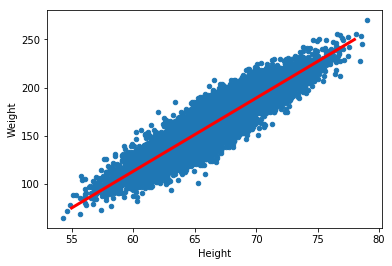

In [15]:
df.plot(kind = 'Scatter',
       x='Height',
       y = 'Weight')
#The line is drawn by hand
#We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

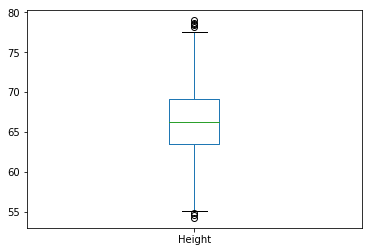

In [8]:
df.plot(kind='box',y='Height',x='Gender')

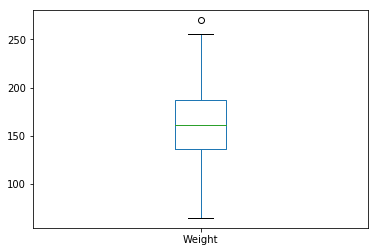

In [9]:
df.plot(kind='box',y='Weight',x='Gender')

In [13]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [16]:
def line(x,w,b):
    return ((x*w)+b)

In [17]:
x = np.linspace(55,80,100)

In [18]:
yHat = line(x,0,0)

In [ ]:
# df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yHat, color='red', linewidth=3) #x is value generated from LineSpace func and yHat is all 0 as w and b are 0

# Cost Function

In [25]:
def costFunc(y,yHat):#Mean Squared Error
    return ((y-yHat)**2).mean()

In [30]:
X = df[['Height']].values
y = df['Weight'].values

In [32]:
yHat = line(X,0,0)

In [33]:
costFunc(y,yHat)

27093.83757456164

Text(0.5,0,'b')

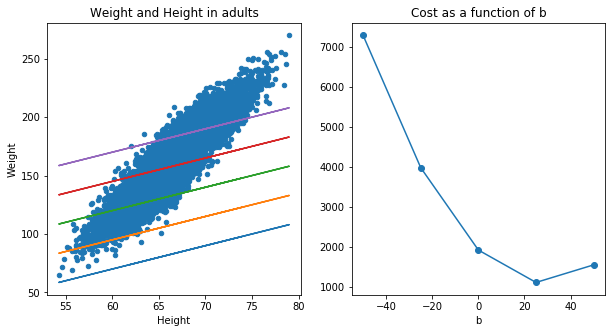

In [42]:
plt.figure(figsize=(10, 5))
# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -50 and +50
bbs = np.array([-50,-25,0,25,50])
mses = []

def looper(bb=[]):
    for b in bb:
        y_pred = line(X,w=2,b=b)
        mses.append(costFunc(y,y_pred))
        plt.plot(X, y_pred)
looper(bbs)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

# Keras

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

/Users/a0r00rf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [44]:
model = Sequential()

In [45]:
model.add(Dense(1, input_shape=(1,)))

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [49]:
model.fit(X, y, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 1s 68us/step - loss: 945.9074
Epoch 2/40
10000/10000 [==============================] - 0s 39us/step - loss: 563.5947
Epoch 3/40
10000/10000 [==============================] - 0s 42us/step - loss: 519.4452
Epoch 4/40
10000/10000 [==============================] - 0s 39us/step - loss: 480.1668
Epoch 5/40
10000/10000 [==============================] - 0s 37us/step - loss: 443.1330
Epoch 6/40
10000/10000 [==============================] - 0s 40us/step - loss: 392.9586
Epoch 7/40
10000/10000 [==============================] - 0s 37us/step - loss: 350.4687
Epoch 8/40
10000/10000 [==============================] - 0s 43us/step - loss: 339.2772
Epoch 9/40
10000/10000 [==============================] - 0s 46us/step - loss: 304.7703
Epoch 10/40
10000/10000 [==============================] - 0s 43us/step - loss: 279.5657
Epoch 11/40
10000/10000 [==============================] - 0s 42us/step - loss: 249.0801
Epoch 12/40
10000/10000 [=====

In [50]:
yHat = model.predict(X)

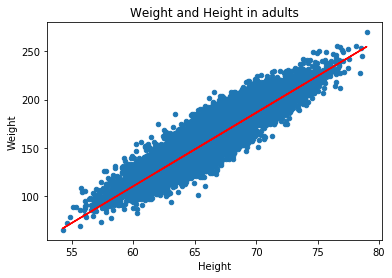

In [53]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, yHat, color='red')

In [54]:
W, B = model.get_weights()

In [55]:
W

array([[7.636795]], dtype=float32)

In [56]:
B

array([-348.23672], dtype=float32)